Below is the code for a kaggle competition that is ongoing 

In [1]:
'''Import the packages needed to run'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy.stats import normaltest
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
'''Pull all the data from the .csv files into dataframes'''
supplement_clinical_data=pd.read_csv('supplemental_clinical_data.csv')
train_clinical_data=pd.read_csv('train_clinical_data.csv')
train_peptides=pd.read_csv('train_peptides.csv')
train_proteins=pd.read_csv('train_proteins.csv')

In [4]:
supplement_clinical_data=pd.DataFrame(supplement_clinical_data)
train_clinical_data=pd.DataFrame(train_clinical_data)
train_peptides=pd.DataFrame(train_peptides)
train_proteins=pd.DataFrame(train_proteins)

EXPLORATORY DATA ANALYSIS

Below is the length of each of the datasets for the competition:

In [5]:
print("The length of the train_clinical_data is: ",len(train_clinical_data))
print("The length of the train_peptides is: ",len(train_peptides))
print("The length of the train_proteins is: ",len(train_proteins))
print("The length of the supplement_clinical_data is: ",len(supplement_clinical_data))

The length of the train_clinical_data is:  2615
The length of the train_peptides is:  981834
The length of the train_proteins is:  232741
The length of the supplement_clinical_data is:  2223


Info of each of the datasets that are being extracted and installed into a .csv file in the same directory:

In [7]:
'''Since there are multiple datasets its best to view them in a single csv file which you can later use on Excel spreadsheet or
RStudio for statistical analysis'''

# define list of file paths
dataframes = [train_clinical_data,train_peptides,train_proteins,supplement_clinical_data]

df_info = pd.DataFrame(columns=['File', 'Shape', 'Columns', 'Data types', 'Summary statistics'])


# loop through each file path
for df in dataframes:

    file_name = df.index.name if df.index.name is not None else 'Unnamed index'

    # read in file as a DataFrame    
    # get basic information about the DataFrame
    print('File: ', dataframes)
    print('Shape: ', df.shape)
    print('Columns: ', df.columns)
    print('Data types:\n', df.dtypes)
    print('Summary statistics:\n', df.describe())
    print('\n')


    # get basic information about the DataFrame
    df_shape = pd.DataFrame({'File': file_name, 'Shape': [str(df.shape)]})
    df_cols = pd.DataFrame({'File': file_name, 'Columns': [str(df.columns.tolist())]})
    df_dtypes = pd.DataFrame({'File': file_name, 'Data types': [str(df.dtypes)]})
    df_summary = df.describe().reset_index().rename(columns={'index': 'Summary statistics'})
    df_summary['File'] = file_name
    
    # append the information to the empty DataFrame
    df_info = df_info.append(df_shape)
    df_info = df_info.append(df_cols)
    df_info = df_info.append(df_dtypes)
    df_info = df_info.append(df_summary)

# write the information to a CSV file
df_info.to_csv('data_info.csv', index=False)


File:  [      visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         55_0          55            0     10.0      6.0     15.0      NaN   
1         55_3          55            3     10.0      7.0     25.0      NaN   
2         55_6          55            6      8.0     10.0     34.0      NaN   
3         55_9          55            9      8.0      9.0     30.0      0.0   
4        55_12          55           12     10.0     10.0     41.0      0.0   
...        ...         ...          ...      ...      ...      ...      ...   
2610  65043_48       65043           48      7.0      6.0     13.0      0.0   
2611  65043_54       65043           54      4.0      8.0     11.0      1.0   
2612  65043_60       65043           60      6.0      6.0     16.0      1.0   
2613  65043_72       65043           72      3.0      9.0     14.0      1.0   
2614  65043_84       65043           84      7.0      9.0     20.0      3.0   

     upd23b_clinical_state_on_medication  


In [9]:
'''Pull the statistical data from the csv file and put it into a dataframe for further analysis'''

# pull the data from the csv file
statistical_data=pd.read_csv('data_info.csv')

# put the data into a dataframe
statistical_data=pd.DataFrame(statistical_data)

Lets begin with the smaller dataset in this case the supplement_clinical_data dataset:

train_clinical_data.csv

visit_id - ID code for the visit.

visit_month - The month of the visit, relative to the first visit by the patient.

patient_id - An ID code for the patient.

updrs_[1-4] - The patient's score for part N of the Unified Parkinson's Disease Rating Scale. Higher numbers indicate more severe symptoms. Each 
sub-section covers a distinct category of symptoms, such as mood and behavior for Part 1 and motor functions for Part 3.


upd23b_clinical_state_on_medication - Whether or not the patient was taking medication such as Levodopa during the UPDRS assessment. Expected to mainly affect the scores for Part 3 (motor function). These medications wear off fairly quickly (on the order of one day) so it's common for patients to take the motor function exam twice in a single month, both with and without medication.



supplemental_clinical_data.csv Clinical records without any associated CSF samples. This data is intended to provide additional context about the typical progression of Parkinsons. Uses the same columns as train_clinical_data.csv.

In [10]:
supplement_clinical_data.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


Notes: A good use of the above updrs_[1-4] would be to first look into this scale and get the relative scores with each progressing visit along with the mediication being used for the patient or not to determine and see if the hypothesis holds valid for the variable being used with a statistical score.

Below is the list of columns and their data points

In [11]:
supplement_clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2223 non-null   object 
 1   patient_id                           2223 non-null   int64  
 2   visit_month                          2223 non-null   int64  
 3   updrs_1                              2010 non-null   float64
 4   updrs_2                              2009 non-null   float64
 5   updrs_3                              2218 non-null   float64
 6   updrs_4                              1295 non-null   float64
 7   upd23b_clinical_state_on_medication  1122 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 139.1+ KB


Below is the list of null counts for each of the columns in the dataframe

In [12]:
supplement_clinical_data.isna().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                 213
updrs_2                                 214
updrs_3                                   5
updrs_4                                 928
upd23b_clinical_state_on_medication    1101
dtype: int64

From what I can tell from the data that upd23b_clinical_state_on_medication column represents whether the patient is currently on medication or not. But since the patient is on medication the object datatype associated with it is 'On' for the rest which is 'Off' is given as NaN data type which needs to be converted to On or Off or binary for the program to work properly.


So first lets check whether there are two unique variables for that below:

In [13]:
supplement_clinical_data.nunique()

visit_id                               2223
patient_id                              771
visit_month                               8
updrs_1                                  28
updrs_2                                  29
updrs_3                                  70
updrs_4                                  12
upd23b_clinical_state_on_medication       2
dtype: int64

Looking at the scores of the medications

In [14]:
'''Here we are going to look at the 
distribution of the UPDRS scores and
I want to see if there are any outliers 
that we need to remove or handle nay NaN 
values that we need to replace'''

# Below is a list of the columns that contain the UPDRS scores
all_updrs=['updrs_1','updrs_2','updrs_3','updrs_4']

# below is a for loop to loop through the columns and extract the unique values                                                            
unique_values = {}
for col in supplement_clinical_data[all_updrs]:
    unique_values[col] = supplement_clinical_data[col].unique()



Below is the list of unique values for each variable:

In [15]:
unique_values 

{'updrs_1': array([ 5.,  6.,  4.,  1., nan,  8.,  2.,  3., 10.,  7.,  0., 24., 13.,
        17., 11.,  9., 12., 15., 14., 20., 19., 16., 22., 23., 18., 27.,
        25., 26., 21.]),
 'updrs_2': array([ 3.,  4.,  6.,  8., nan,  7.,  2., 18.,  9., 11.,  1., 17., 13.,
        12., 20., 15.,  0.,  5., 14., 16., 19., 10., 22., 21., 24., 27.,
        34., 25., 30., 31.]),
 'updrs_3': array([16., 20., 26., 38.,  0.,  6.,  8.,  9., 22., 17., 12., 24., 18.,
        14., 13., 11., 21., 32., 19., 25., 30., 49., 33., 35., 44., 54.,
        43., 47., 34., 36., 27., 15., 23., 10., 37., 51.,  1., 39.,  2.,
        31., 29., 53., 41., 50.,  7., 42., 28.,  5.,  3., 40., 45.,  4.,
        52., 46., 68., 48., 63., 56., 61., 60., nan, 57., 55., 66., 72.,
        58., 67., 59., 70., 62., 69.]),
 'updrs_4': array([ 0., nan,  4.,  3.,  6.,  2.,  1.,  9.,  8., 10.,  7.,  5., 12.])}

Since the main code consists of multple null values lets find the best solution to the problem depending on the dataset parameters:

An initial snapshot of the datatype from the .csv file are:

visit_id                                object

patient_id                               int64

visit_month                              int64

updrs_1                                float64

updrs_2                                float64

updrs_3                                float64

updrs_4                                float64

upd23b_clinical_state_on_medication     object

dtype: object


Creating a test dataframe for the clinical data:

In [16]:
supplement_clinical_data=supplement_clinical_data.drop(columns=['visit_id'])

<AxesSubplot:>

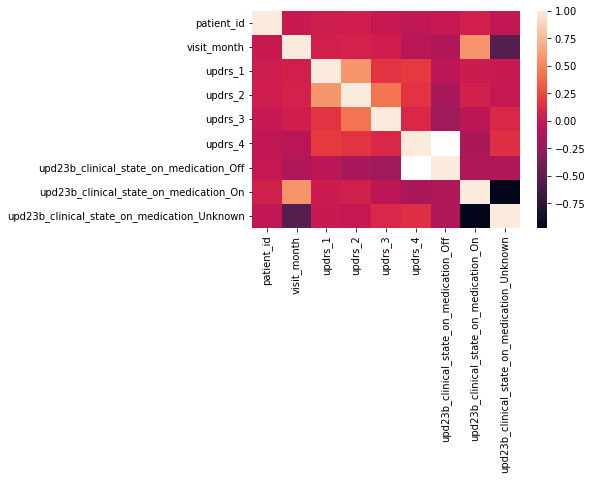

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
cor_matrix=supplement_clinical_data.corr()

sns.heatmap(cor_matrix)
